In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv("mtcars.csv")

In [3]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
#checking null values
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [5]:
#check linerity
df.corr().mpg

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64

In [9]:
df_linear = df.loc[:,['cyl','disp','hp','wt']]

In [10]:
df_linear

,cyl,disp,hp,wt
0,6,160.0,110,2.620
1,6,160.0,110,2.875
2,4,108.0,93,2.320
3,6,258.0,110,3.215
4,8,360.0,175,3.440
5,6,225.0,105,3.460
6,8,360.0,245,3.570
7,4,146.7,62,3.190
8,4,140.8,95,3.150
9,6,167.6,123,3.440


In [11]:
# checking Normality

In [12]:
#skewness and kurtosis be between 1 and -1.

In [13]:
from scipy import stats
print("skewness of cyl " ,stats.skew(df_linear.cyl))
print("Kurtosis of cyl " ,stats.kurtosis(df_linear.cyl))

skewness of cyl  -0.18312865234479678
Kurtosis of cyl  -1.6809684168130405


In [14]:
print("Skewness of disp " , stats.skew(df_linear.disp))
print("Kurtosis of disp ", stats.kurtosis(df_linear.disp))

Skewness of disp  0.40027244847286664
Kurtosis of disp  -1.0896826570135087


In [15]:
print("SKewness of wt ",stats.skew(df_linear.wt))
print("Kurtosis of wt ",stats.kurtosis(df_linear.wt))

SKewness of wt  0.44378553550607736
Kurtosis of wt  0.1724705401587343


In [16]:
df_normal = df_linear.loc[:,['cyl','wt','hp']]

In [17]:
#check little or no colinearity

In [18]:
df_normal = df.loc[:,['cyl','wt','hp','mpg']]

In [19]:
df_normal.corr()

,cyl,wt,hp,mpg
cyl,1.000000,0.782496,0.832447,-0.852162
wt,0.782496,1.000000,0.658748,-0.867659
hp,0.832447,0.658748,1.000000,-0.776168
mpg,-0.852162,-0.867659,-0.776168,1.000000


<AxesSubplot:>

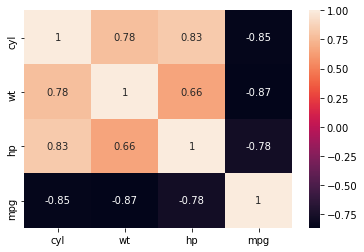

In [20]:

sns.heatmap(df_normal.corr(),annot=True)

In [23]:
X = df.loc[:,['wt','hp']] #predictors

In [24]:
y = df['mpg']  #target

In [25]:
#Spliting dataset into training dataset and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
#importing Linear Regression model and initializing the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(X_train,y_train)


LinearRegression()

In [29]:
#predicting the data
y_pred = model.predict(X_test)

In [30]:
y_pred

array([20.39035826,  8.90822187, 16.31116444, 26.39899286, 21.77095249,
       19.68262918, 11.70959551, 27.40456156, 16.57113445, 23.25286332,
       17.847977  ])

In [31]:
#checking the model accuracy
from sklearn.metrics import r2_score

In [32]:
r2_score(y_test,y_pred)

0.8087417473745968